# Alzheimer’s disease diagnosis prediction

###Alzheimer’s disease is a brain disorder that gradually affects memory, thinking, and daily activities. It is the leading cause of dementia in older adults and can be emotionally overwhelming for those diagnosed, often bringing feelings of fear, sadness, and uncertainty.

###Early diagnosis is crucial as it allows individuals to make important life decisions while they are still able. It helps manage the disease better with treatments and support, improving the quality of life. It also reduces stigma by increasing understanding and dispelling myths about Alzheimer’s.

###While there are concerns about privacy, the benefits of early diagnosis far outweigh the challenges. It gives individuals the chance to plan for their future, access necessary resources, and take steps to slow the disease's progression, helping them maintain a better quality of life.

##Data importing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_set/alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## Exploratory Data Analysis

In [ ]:
print("\nShape of the dataset (rows, columns):", df.shape)


Shape of the dataset (rows, columns): (2149, 35)


In [ ]:
print("\nSummary statistics for numerical features:")
print(df.describe())


Summary statistics for numerical features:
         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            

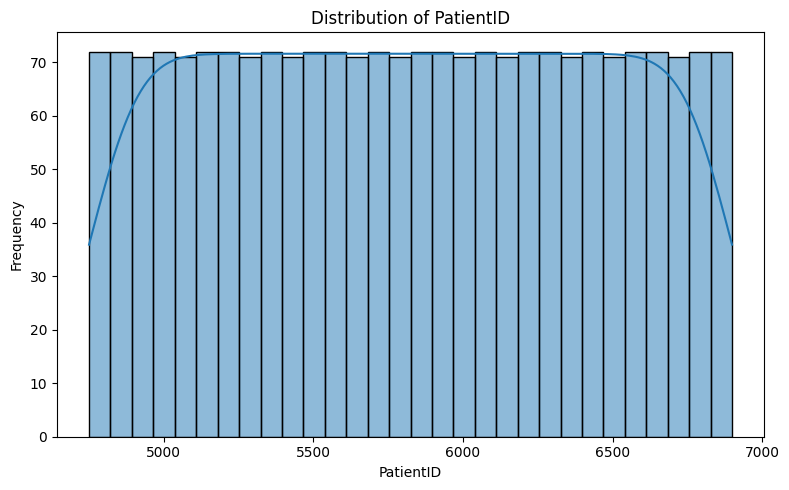

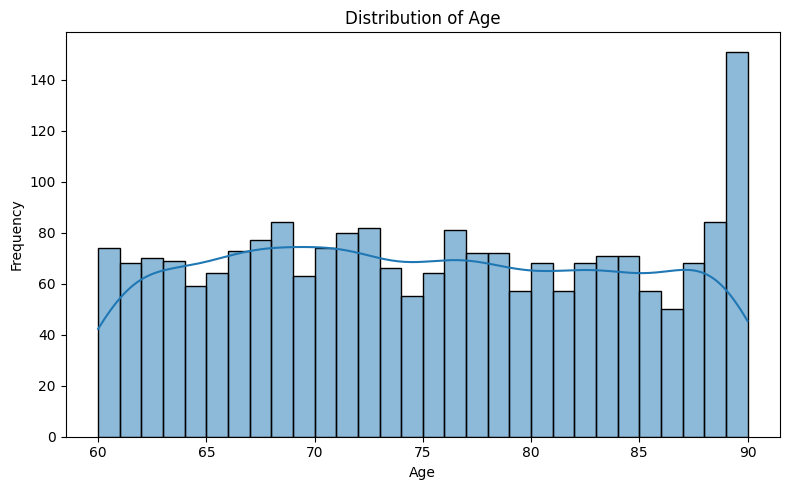

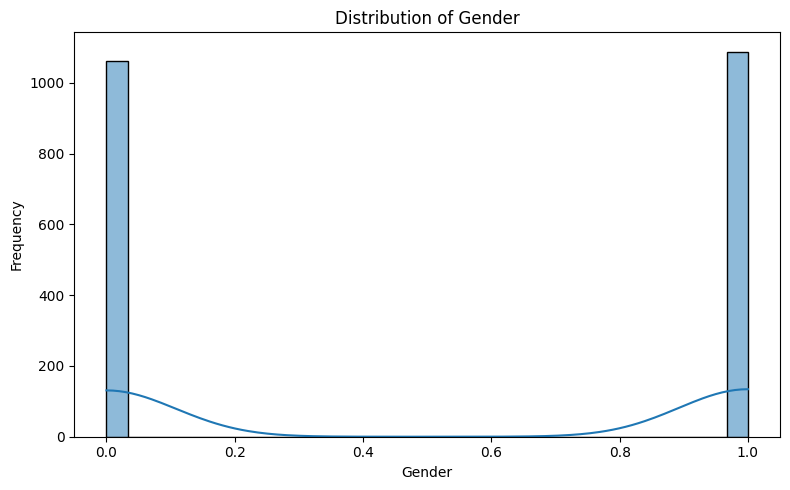

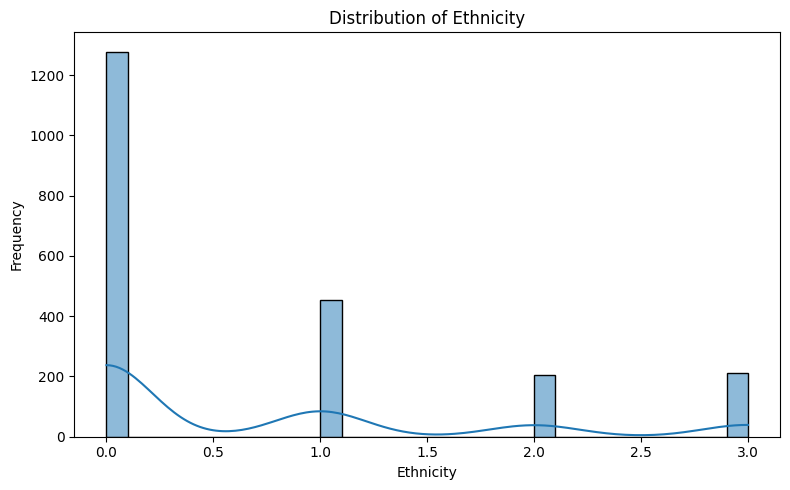

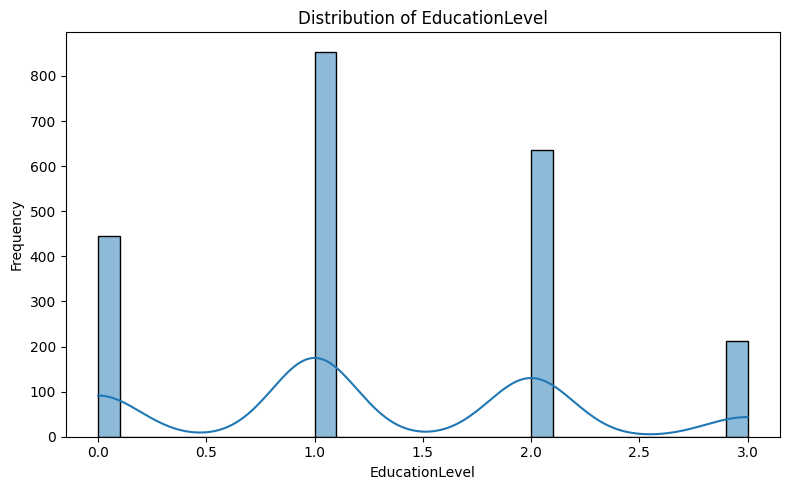

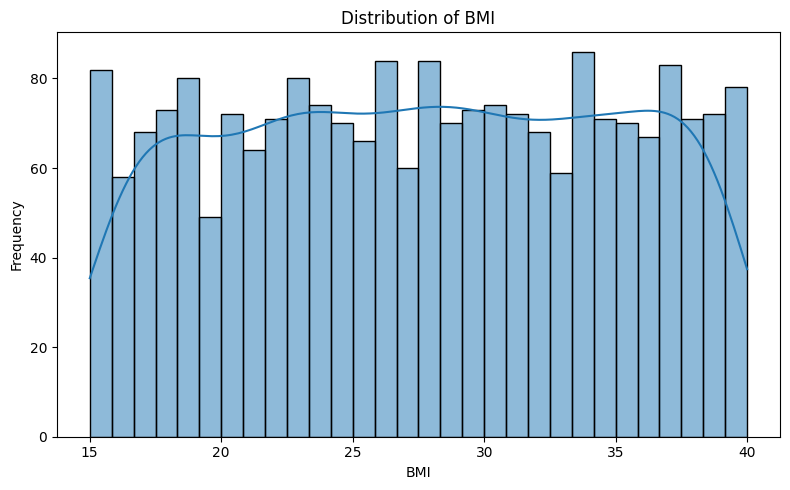

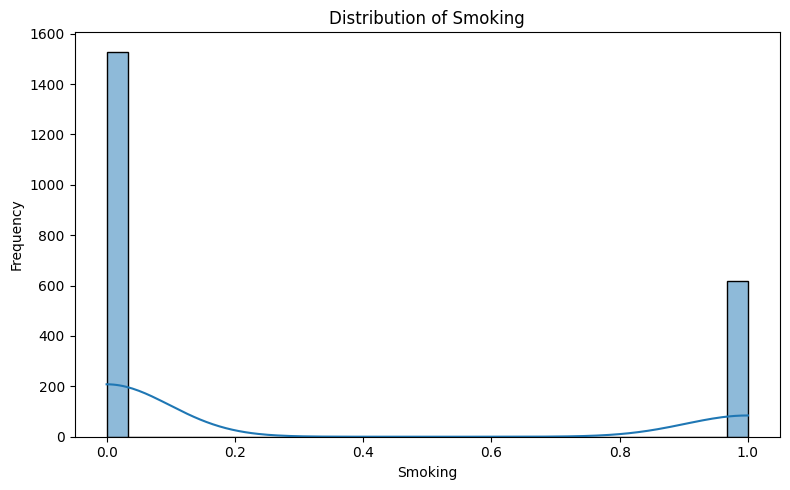

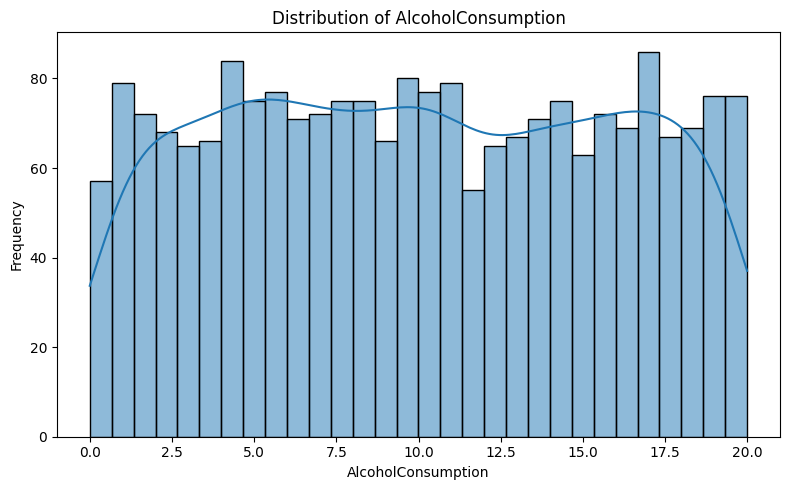

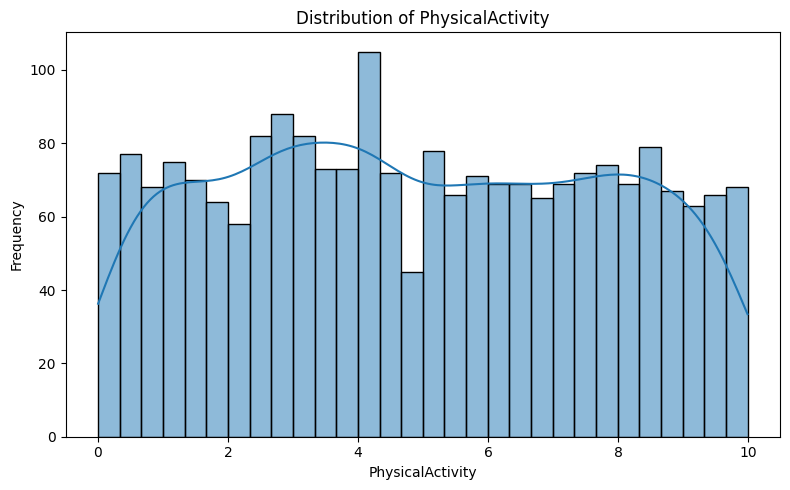

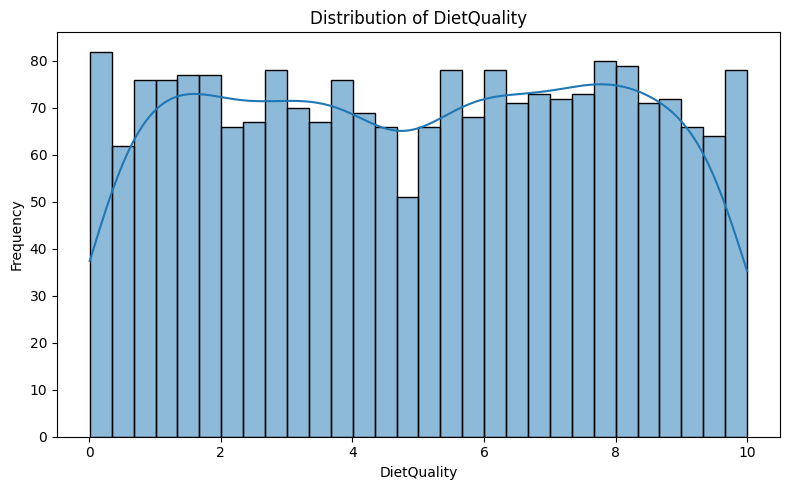

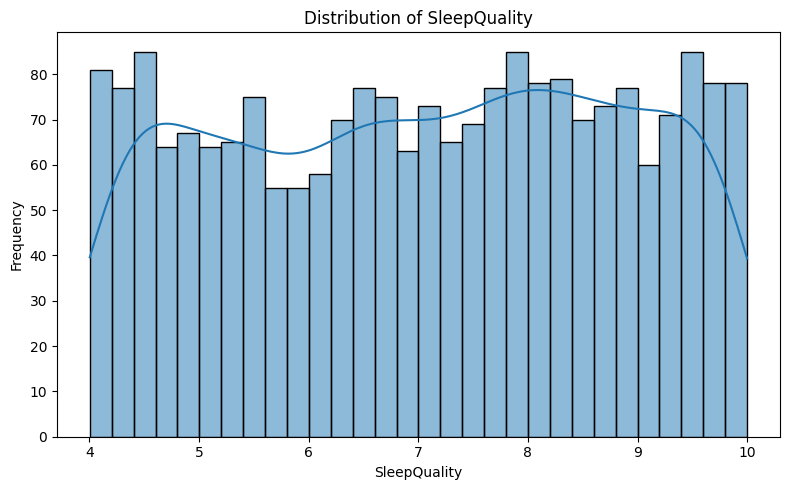

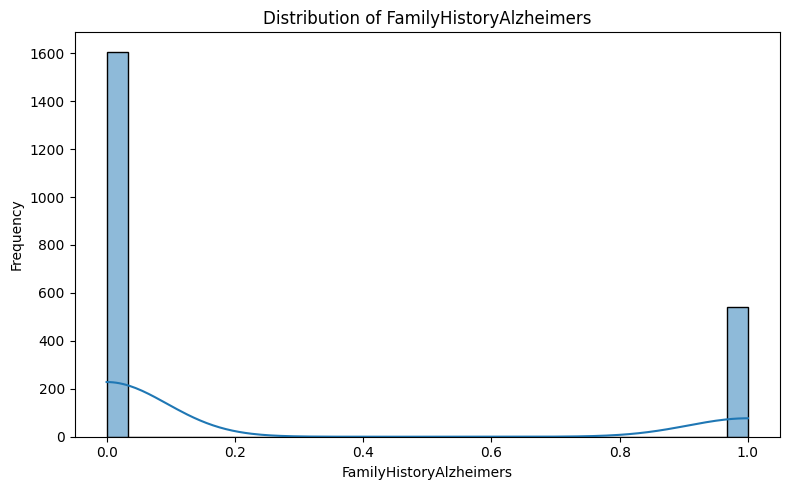

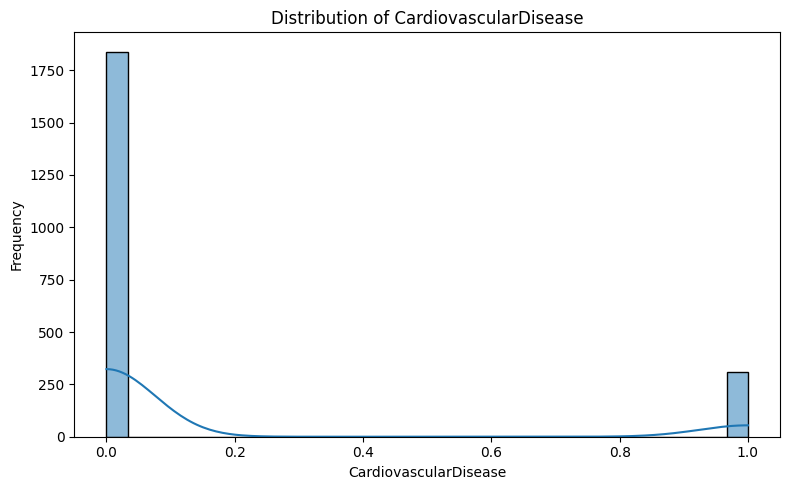

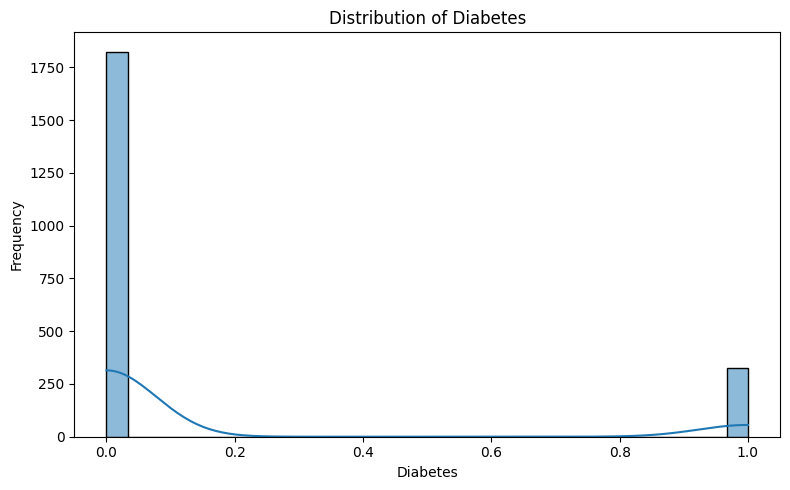

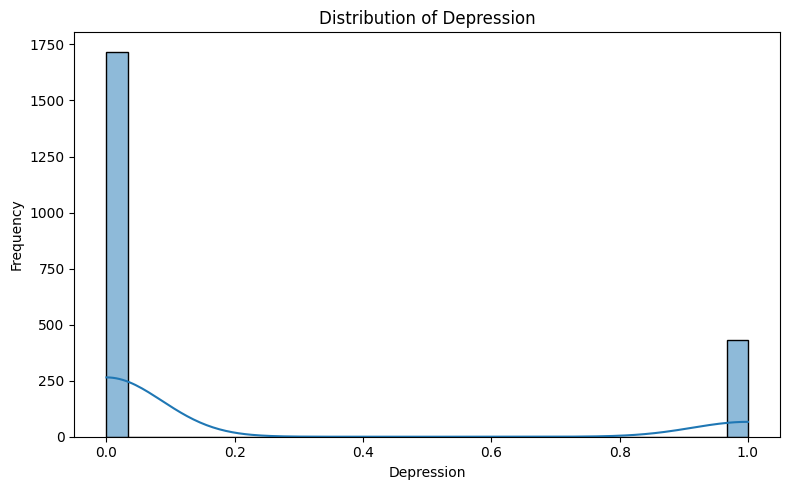

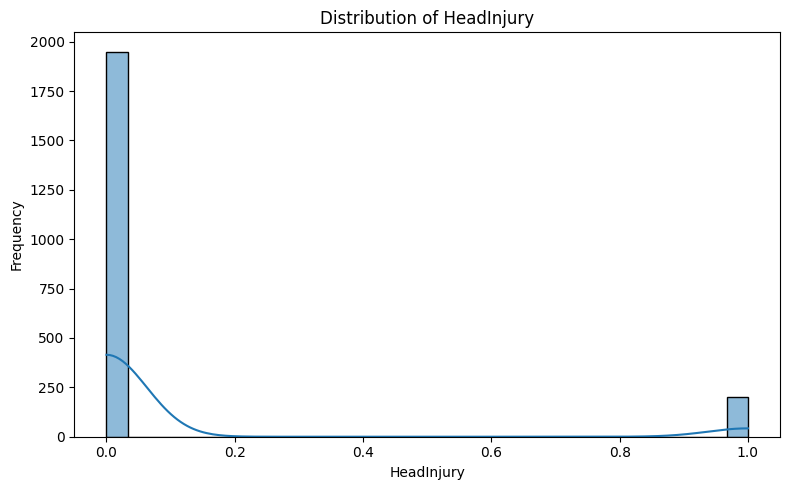

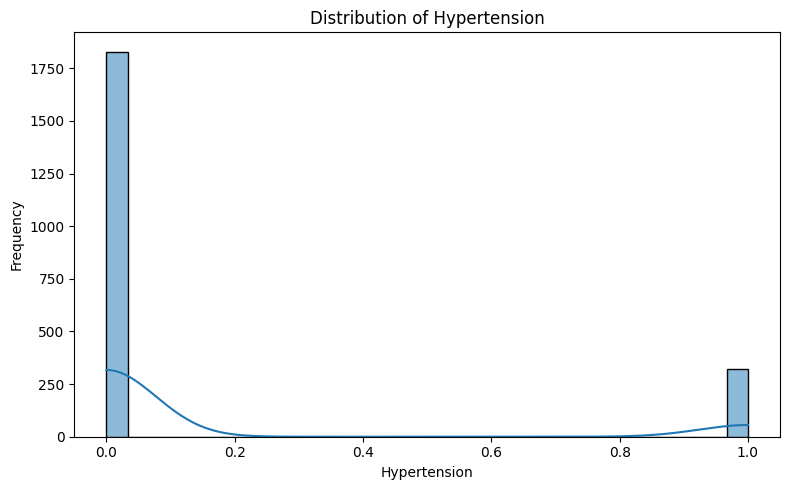

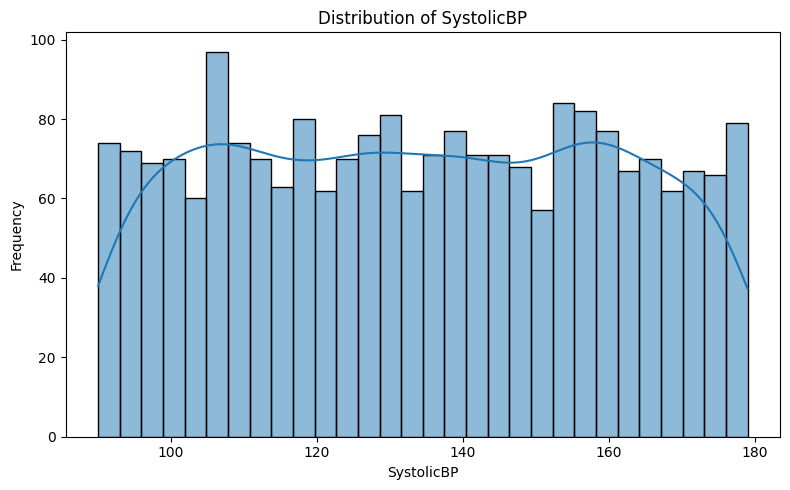

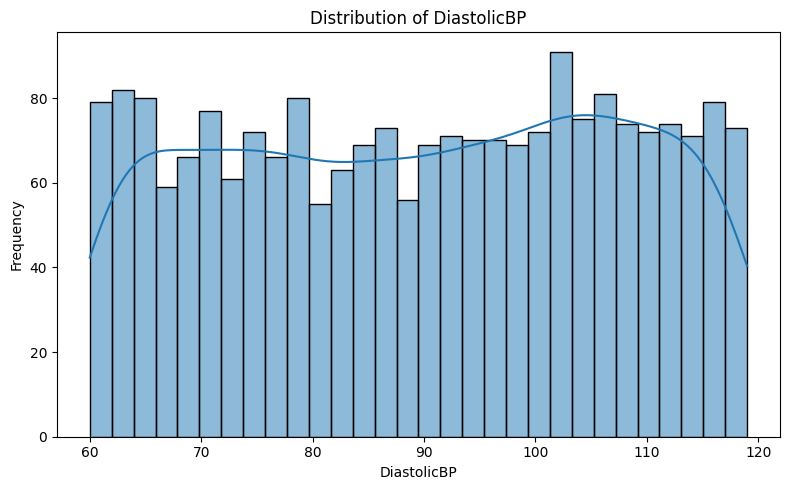

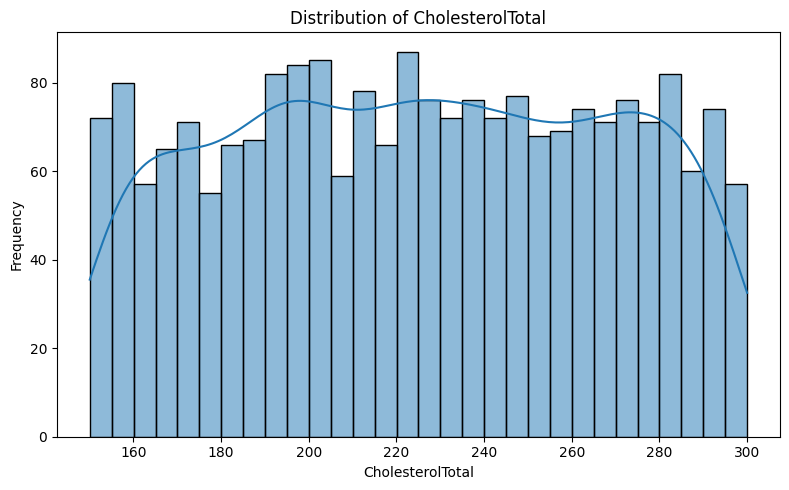

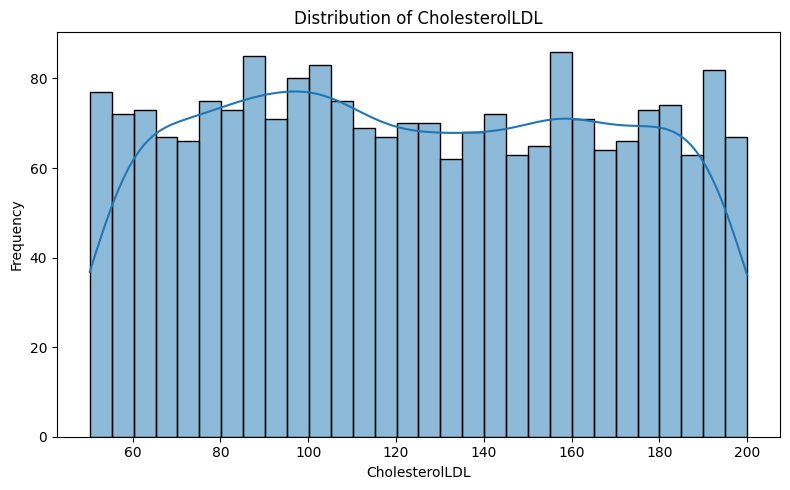

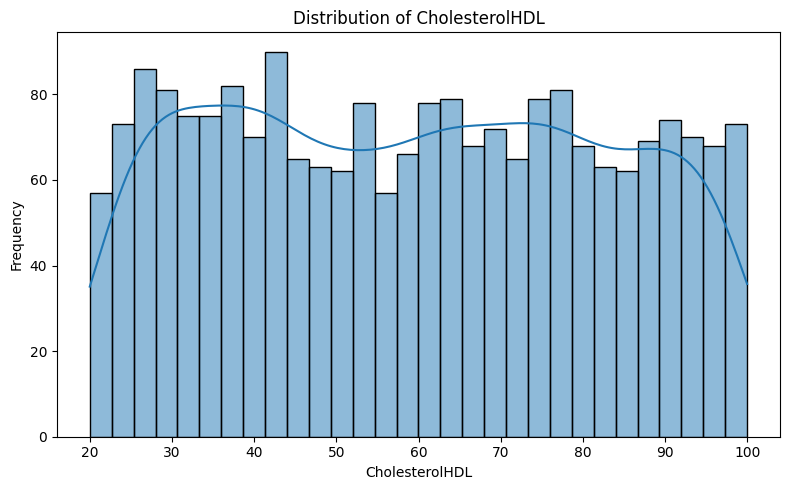

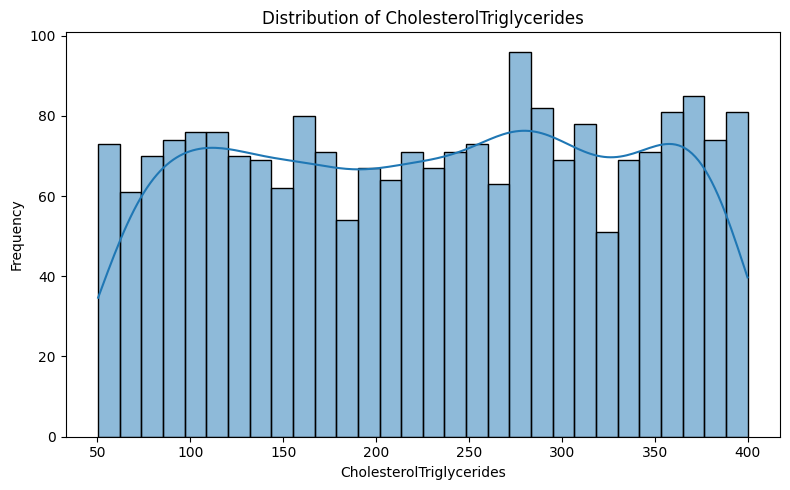

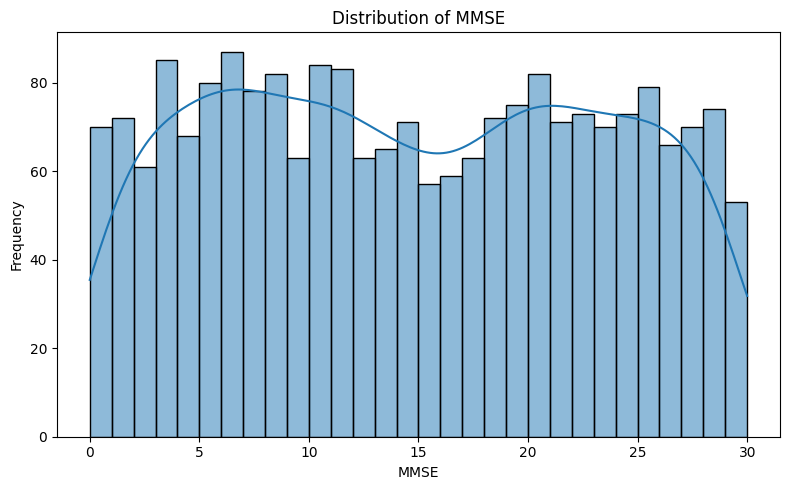

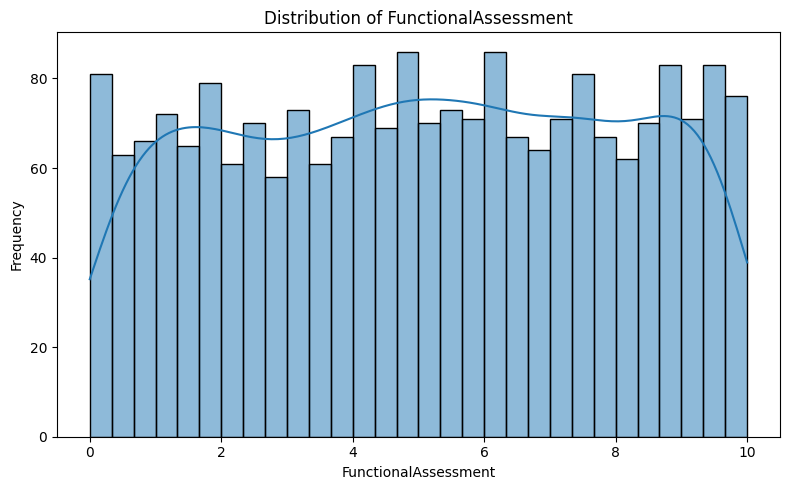

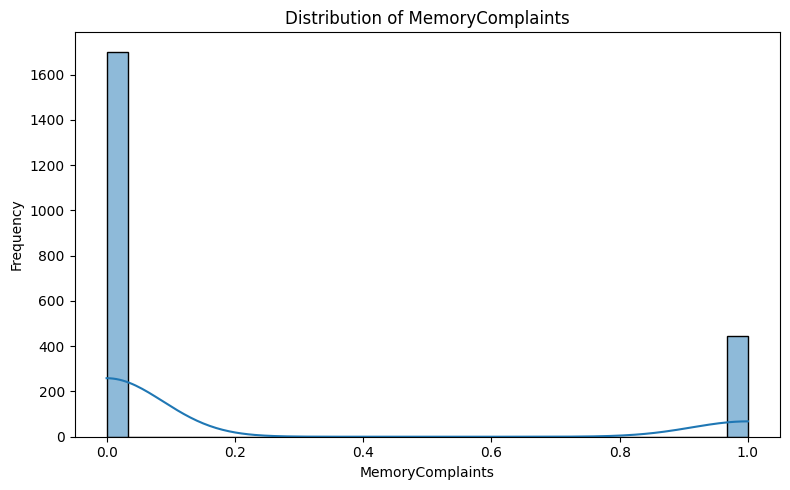

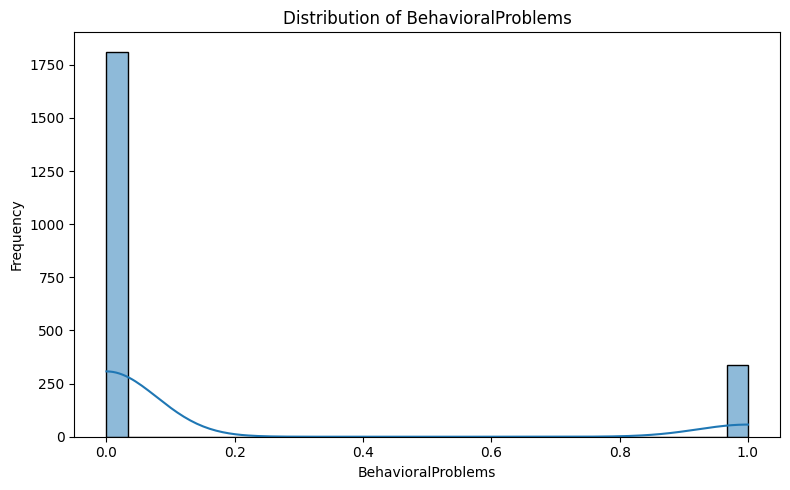

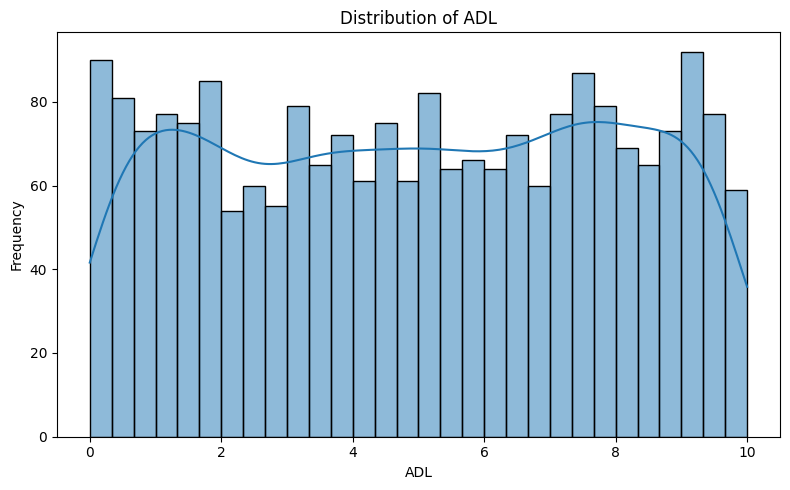

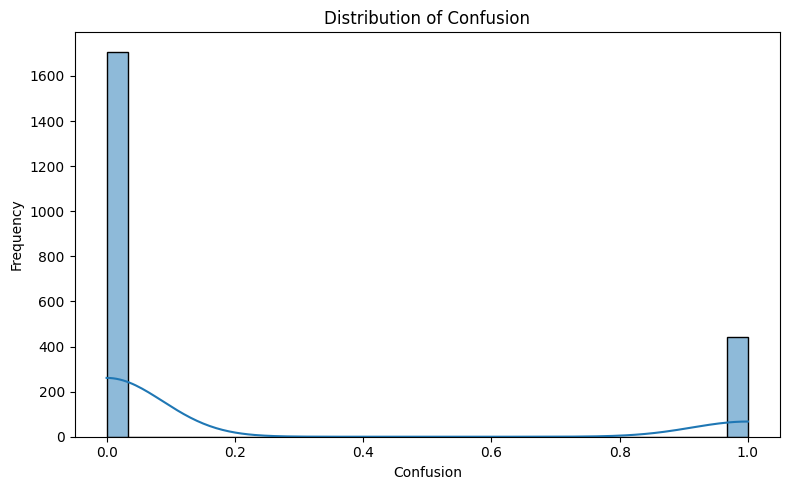

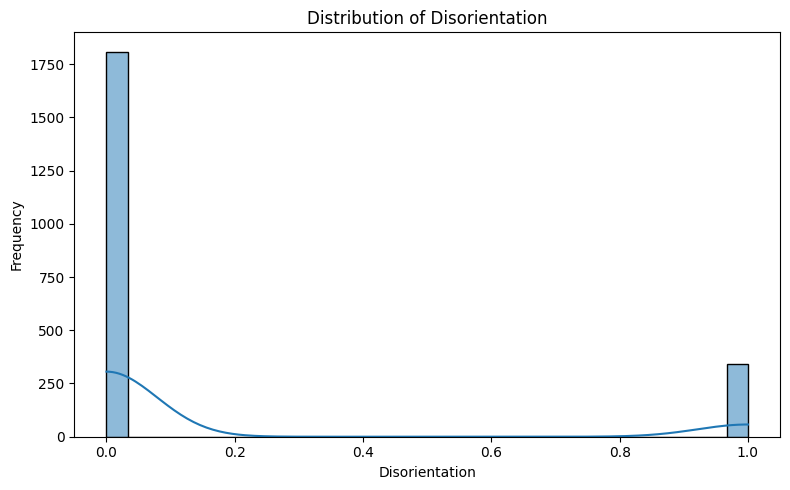

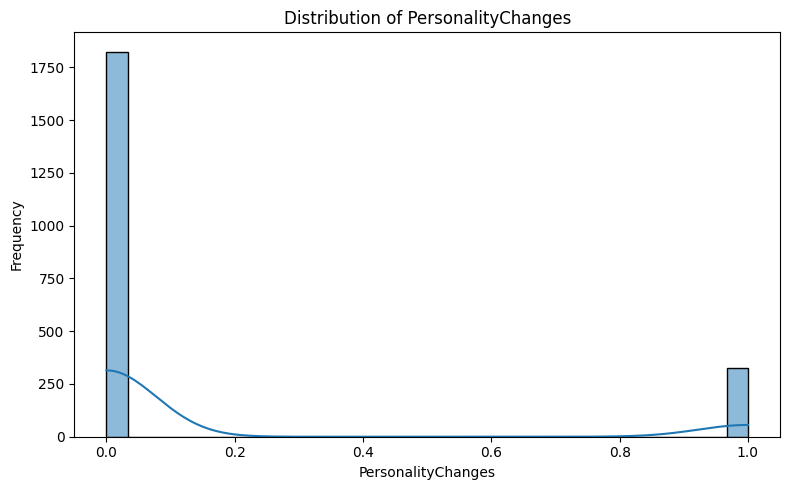

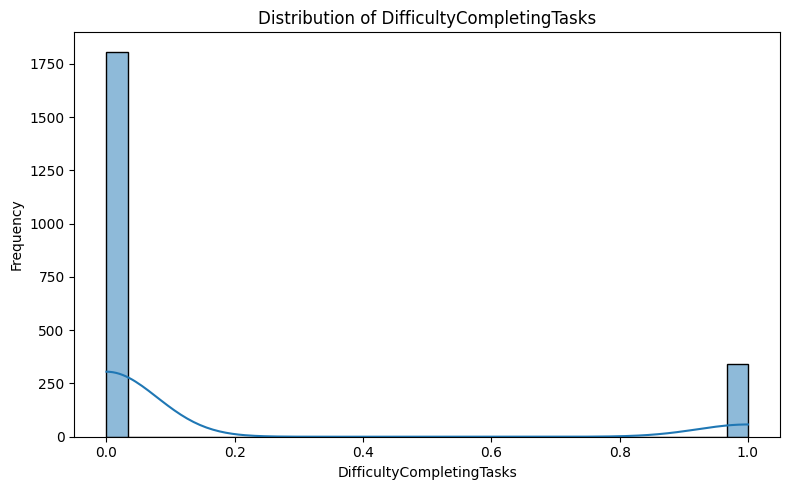

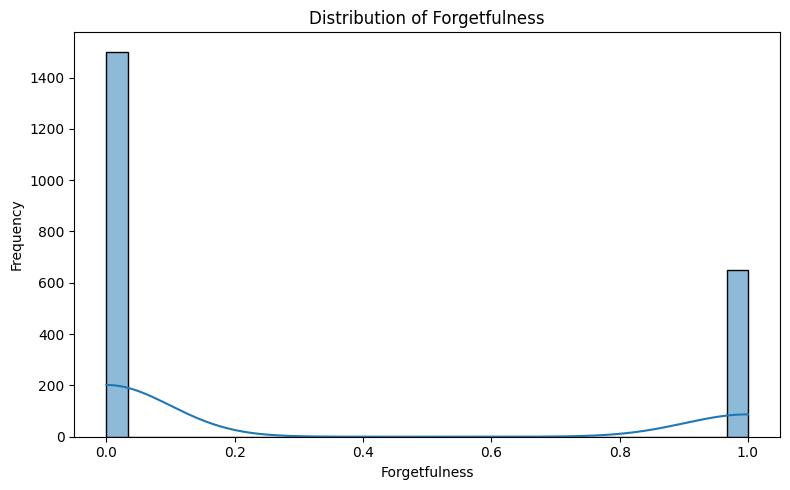

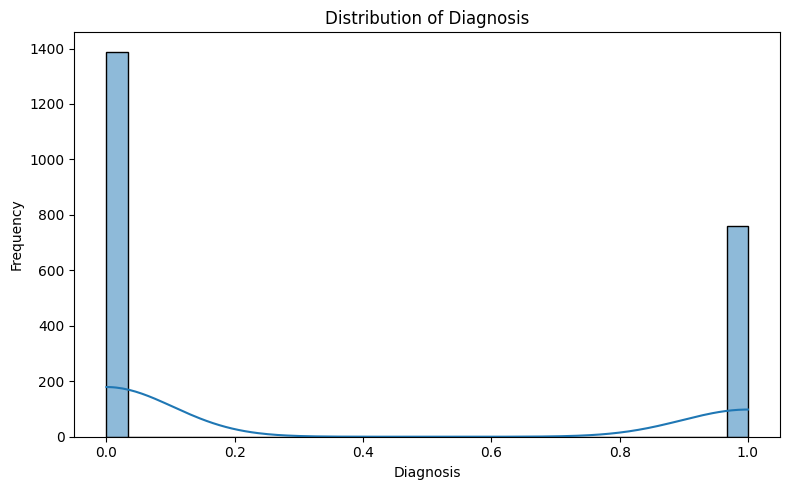

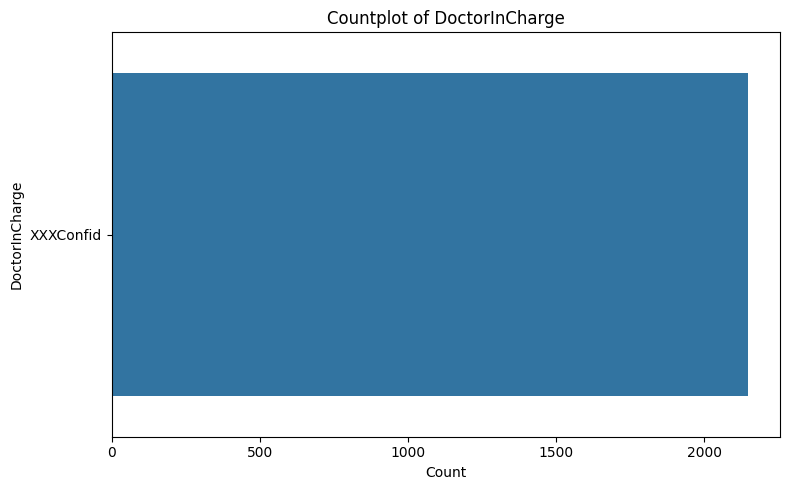

In [ ]:
# Loop through each column in the dataset
for column in df.columns:
    plt.figure(figsize=(8, 5))

    # Check if the column is numeric or categorical
    if df[column].dtype in ['int64', 'float64']:  # Numeric
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")

    else:  # Categorical
        sns.countplot(y=df[column], order=df[column].value_counts().index)
        plt.title(f"Countplot of {column}")
        plt.xlabel("Count")
        plt.ylabel(column)

    plt.tight_layout()
    plt.show()


In [ ]:
df = df.drop(columns=['DoctorInCharge'])
df = df.drop(columns=['PatientID'])
# removing unwanted/repititive columns

There are 34 features. One traget variable -Diagnosis ( binary classification is used.)

In [ ]:
print(df.dtypes)


Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
ADL                          float64
C

There are 15 numerical data 17 catogical data

# Data Preprocessing

In [ ]:
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Saperating target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

# Creating test/train split

(1611, 32) (538, 32)


## Checking for missing values

In [ ]:
print(df.isnull().sum())

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

No missing values

## Checking for duplicate rows

In [ ]:
duplicate_train_rows = X_train.duplicated()

# Display duplicates
print(X_train[duplicate_train_rows])

Empty DataFrame
Columns: [Age, Gender, Ethnicity, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness]
Index: []

[0 rows x 32 columns]


In [ ]:
duplicate_test_rows = X_test.duplicated()

# Display duplicates
print(X_test[duplicate_test_rows])

Empty DataFrame
Columns: [Age, Gender, Ethnicity, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness]
Index: []

[0 rows x 32 columns]


No duplicate rows

## Checking for outliers

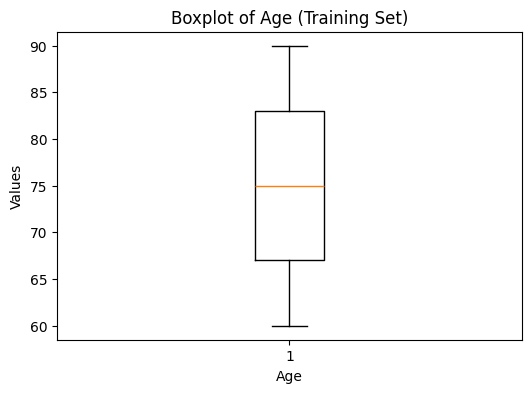

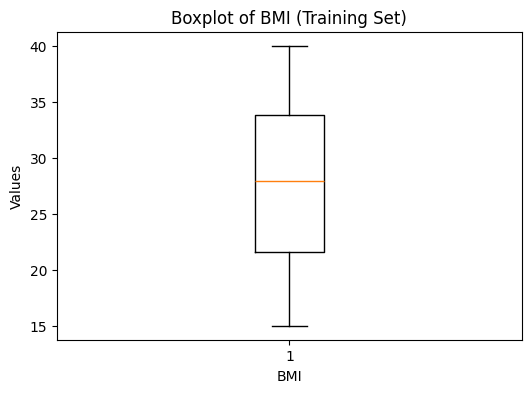

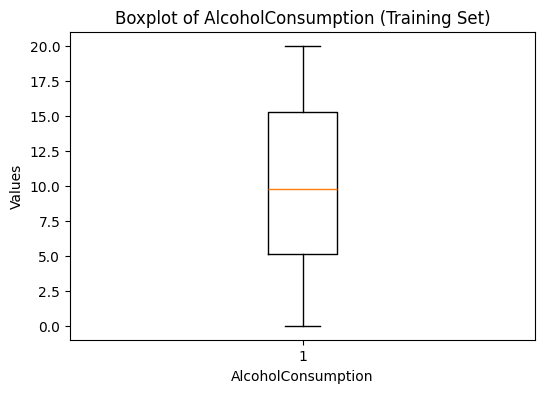

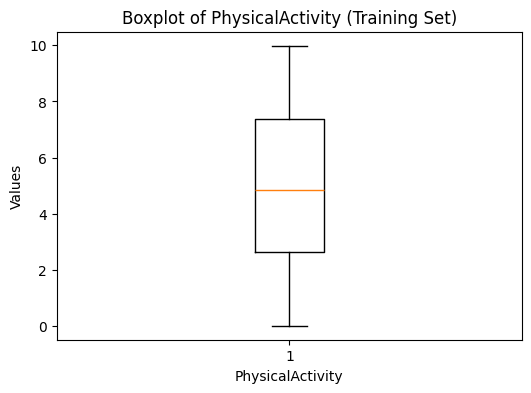

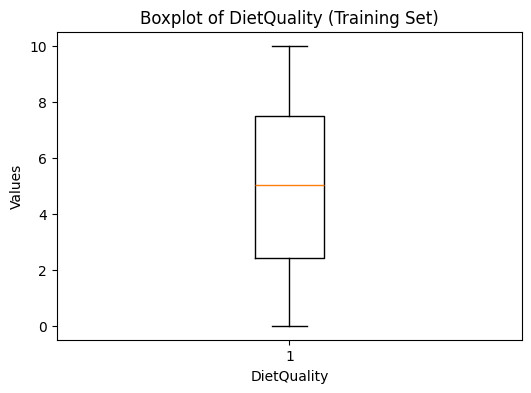

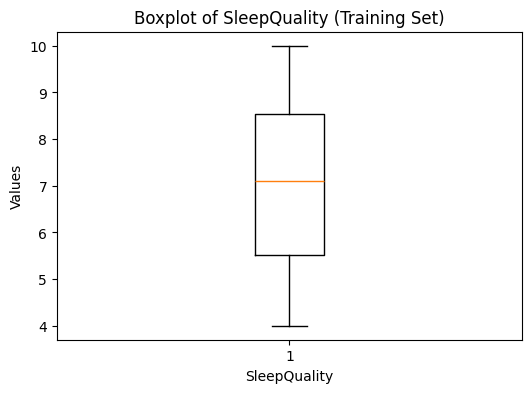

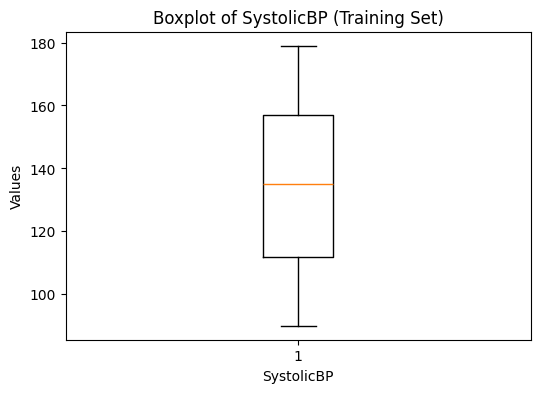

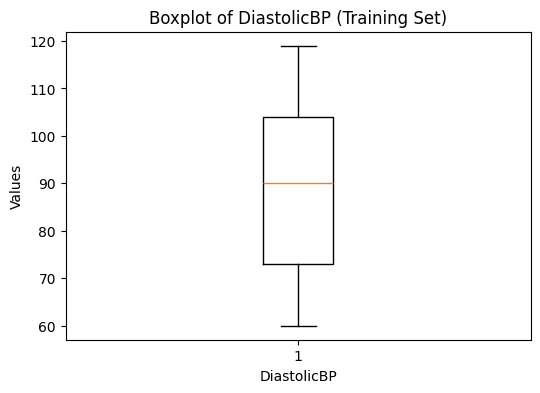

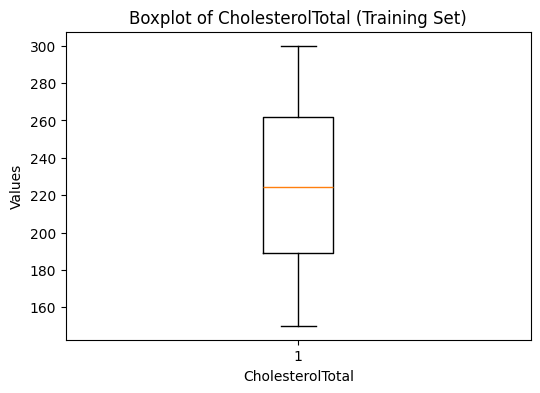

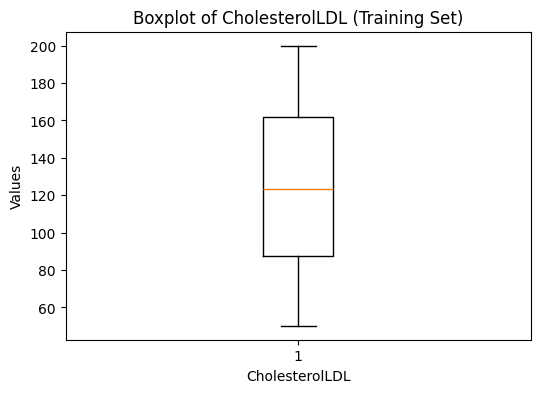

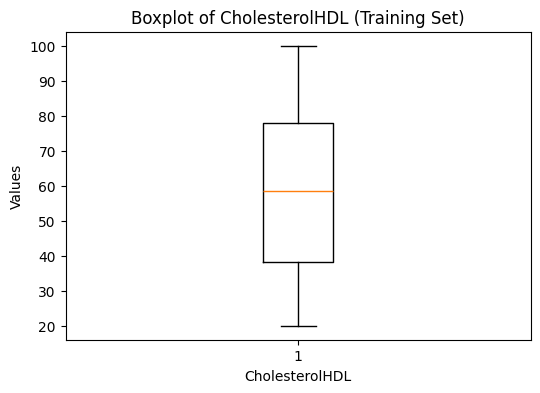

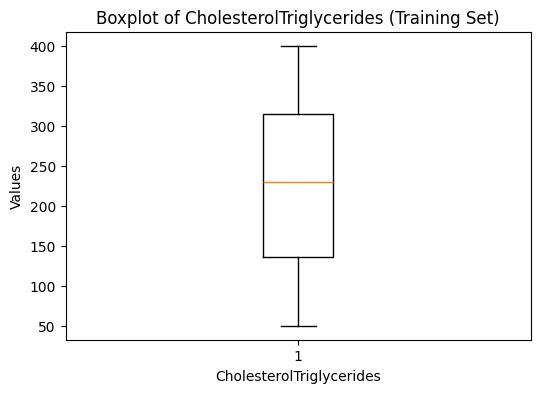

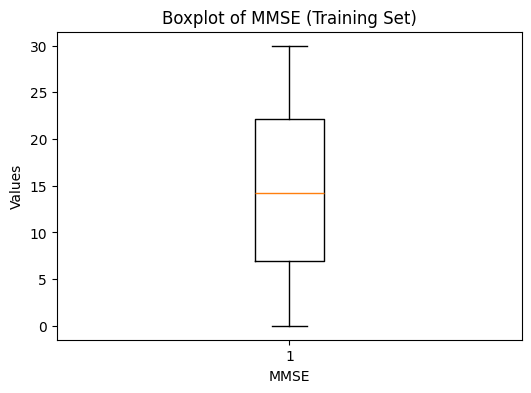

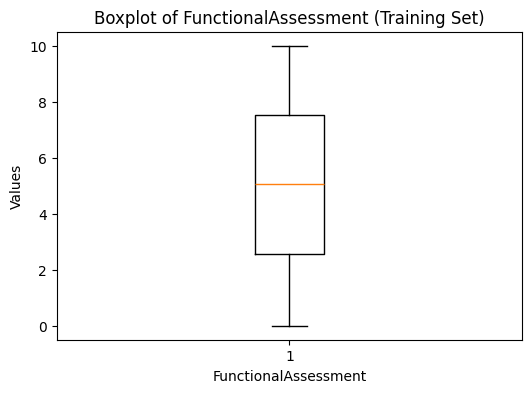

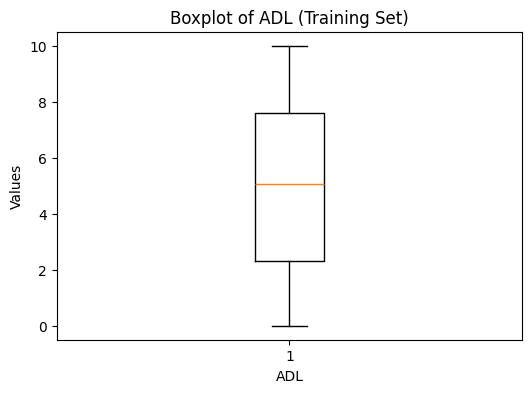

In [ ]:

numerical_columns = [col for col in X_train.select_dtypes(include=['float64', 'int64']).columns
                     if X_train[col].nunique() > 4]

# Creating boxplots for each relevant numerical column in the training set
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(X_train[column])
    plt.title(f'Boxplot of {column} (Training Set)')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()


No outliers

## Feature scaling

In [ ]:
binary_columns = [col for col in X_train.columns if X_train[col].nunique() == 2]
categorical_columns = ['Ethnicity', 'EducationLevel']
numerical_columns = [col for col in X_train.columns if col not in binary_columns + categorical_columns]

In [ ]:
print("Binary Columns:", binary_columns)
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

# Feature scaling was only needed for Numerical columns as binary columns has only 1 and 0

Binary Columns: ['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']
Categorical Columns: ['Ethnicity', 'EducationLevel']
Numerical Columns: ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

#using standardization

## Handling catagorical features

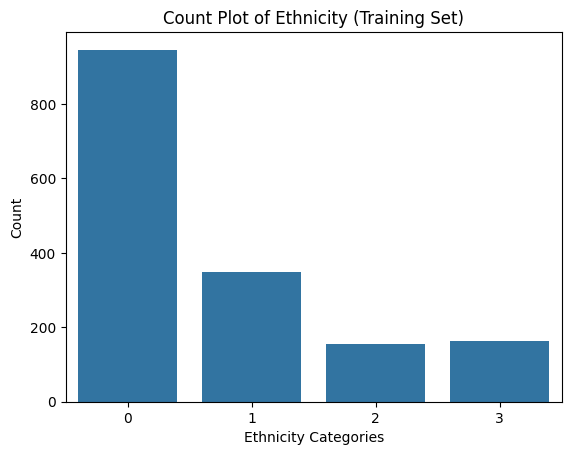

In [ ]:
sns.countplot(x='Ethnicity', data=X_train)
plt.title('Count Plot of Ethnicity (Training Set)')
plt.xlabel('Ethnicity Categories')
plt.ylabel('Count')
plt.show()

There are two non binary catagorical features. (ethnicity and educationan_level). both were in label encoding format but as ethnicity is nominal data one hot encoding were used.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop=None, sparse_output=False)  # drop='first' to avoid multicollinearity

# Fit the encoder on the 'Ethnicity' column from the training set only
X_train_ethnicity_encoded = pd.DataFrame(
    encoder.fit_transform(X_train[['Ethnicity']]),
    index=X_train.index
)

# Apply the same transformation to the test set (no fitting here, only transforming)
X_test_ethnicity_encoded = pd.DataFrame(
    encoder.transform(X_test[['Ethnicity']]),
    index=X_test.index
)

# Rename the columns of the encoded DataFrames for clarity
X_train_ethnicity_encoded.columns = encoder.get_feature_names_out(['Ethnicity'])
X_test_ethnicity_encoded.columns = encoder.get_feature_names_out(['Ethnicity'])

# Drop the original 'Ethnicity' column and join the encoded version back to the datasets
X_train = X_train.drop('Ethnicity', axis=1).join(X_train_ethnicity_encoded)
X_test = X_test.drop('Ethnicity', axis=1).join(X_test_ethnicity_encoded)

# Display the first few rows to verify the encoding
print(X_train.head())

           Age  Gender  EducationLevel       BMI  Smoking  AlcoholConsumption  \
552  -1.100808       0               1 -1.641911        0           -0.652140   
1490 -1.652650       0               3  0.127347        0           -0.446875   
315   0.554720       1               1  0.196061        0            0.065546   
1549 -1.100808       1               0  1.034062        1            1.237228   
453  -1.652650       0               2  0.238866        0           -1.337085   

      PhysicalActivity  DietQuality  SleepQuality  FamilyHistoryAlzheimers  \
552           1.080620    -0.895456      1.303114                        0   
1490          1.242301     0.301843     -1.466694                        1   
315          -0.900482     1.632704      1.440913                        0   
1549          0.596653    -1.328226      0.301408                        0   
453          -1.337839     0.358796      1.594068                        1   

      ...       ADL  Confusion  Disorientati

In [ ]:
print(X_train.dtypes)

Age                          float64
Gender                         int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                   float64
DiastolicBP                  float64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
ADL                          float64
Confusion                      int64
D

## Feature selection

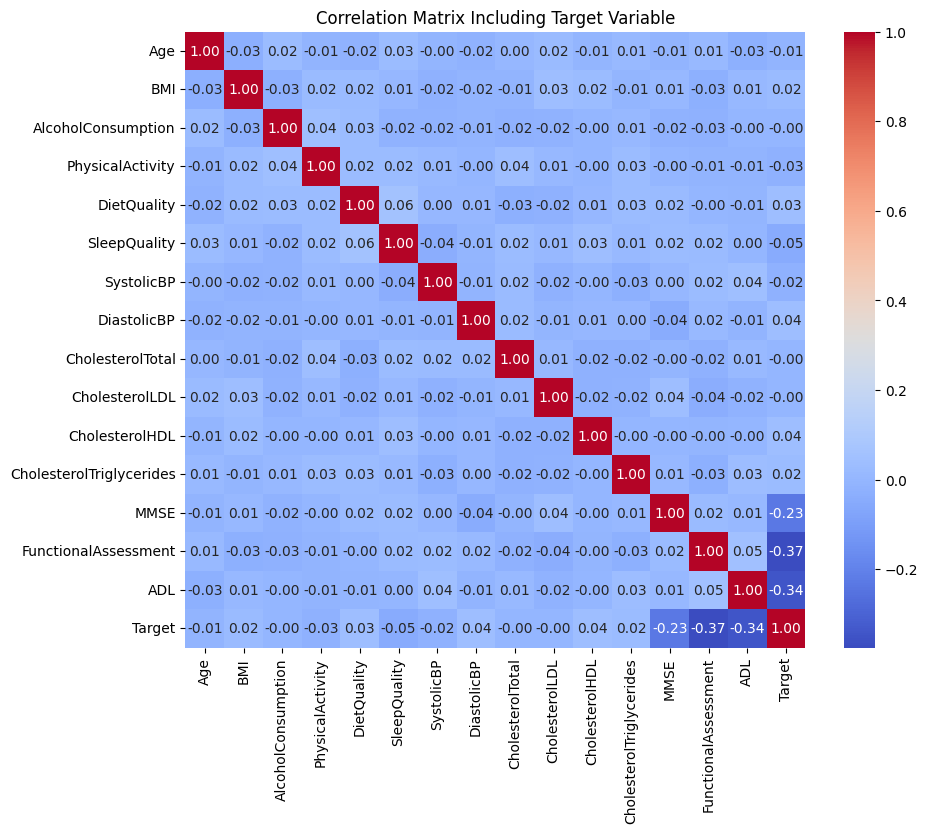

In [ ]:
correlation_data = X_train[numerical_columns].copy()
correlation_data['Target'] = y_train

# Calculate the correlation matrix including the target variable
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Including Target Variable')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Perform the Chi-Square test for each binary column
for col in binary_columns:
    # Create a contingency table for the binary feature and the target variable
    contingency_table = pd.crosstab(X_train[col], y_train)

    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-Square Test for {col}:")
    print(f"Chi-Square Statistic: {chi2:.2f}, p-value: {p:.4f}")
    if p < 0.05:
        print(f"{col} is significantly associated with the target variable (p < 0.05)\n")


Chi-Square Test for Gender:
Chi-Square Statistic: 0.01, p-value: 0.9147
Chi-Square Test for Smoking:
Chi-Square Statistic: 0.13, p-value: 0.7156
Chi-Square Test for FamilyHistoryAlzheimers:
Chi-Square Statistic: 1.53, p-value: 0.2166
Chi-Square Test for CardiovascularDisease:
Chi-Square Statistic: 0.35, p-value: 0.5520
Chi-Square Test for Diabetes:
Chi-Square Statistic: 0.28, p-value: 0.5988
Chi-Square Test for Depression:
Chi-Square Statistic: 0.00, p-value: 0.9879
Chi-Square Test for HeadInjury:
Chi-Square Statistic: 0.62, p-value: 0.4317
Chi-Square Test for Hypertension:
Chi-Square Statistic: 1.04, p-value: 0.3083
Chi-Square Test for MemoryComplaints:
Chi-Square Statistic: 146.47, p-value: 0.0000
MemoryComplaints is significantly associated with the target variable (p < 0.05)

Chi-Square Test for BehavioralProblems:
Chi-Square Statistic: 72.12, p-value: 0.0000
BehavioralProblems is significantly associated with the target variable (p < 0.05)

Chi-Square Test for Confusion:
Chi-Squar

In [ ]:
ethnicity_columns = [col for col in X_train.columns if 'Ethnicity_' in col]
print(ethnicity_columns)

['Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3']


In [ ]:
from scipy.stats import chi2_contingency
for col in ethnicity_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(X_train[col], y_train)

    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-Square Test for {col}:")
    print(f"Chi-Square Statistic: {chi2:.2f}, p-value: {p:.4f}")
    if p < 0.05:
        print(f"{col} is significantly associated with the target variable (p < 0.05)\n")

# Step 2: Perform Chi-Square Test for Educational Level (Label Encoded)
contingency_table = pd.crosstab(X_train['EducationLevel'], y_train)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test for EducationalLevel:")
print(f"Chi-Square Statistic: {chi2:.2f}, p-value: {p:.4f}")
if p < 0.05:
    print("EducationalLevel is significantly associated with the target variable (p < 0.05)\n")

Chi-Square Test for Ethnicity_0:
Chi-Square Statistic: 0.78, p-value: 0.3779
Chi-Square Test for Ethnicity_1:
Chi-Square Statistic: 3.79, p-value: 0.0517
Chi-Square Test for Ethnicity_2:
Chi-Square Statistic: 1.37, p-value: 0.2421
Chi-Square Test for Ethnicity_3:
Chi-Square Statistic: 0.00, p-value: 1.0000
Chi-Square Test for EducationalLevel:
Chi-Square Statistic: 4.60, p-value: 0.2036


In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # Use linear kernel to assess feature importance

# Initialize RFE with the SVM model to select the top features
rfe = RFE(estimator=svm_model, n_features_to_select=len(X_train.columns) - 20)
rfe.fit(X_train, y_train)

# Get the selected features and ranking
selected_features = X_train.columns[rfe.support_]
dropped_features = X_train.columns[~rfe.support_]

print("Features to keep:", selected_features)
print("Features to drop:", dropped_features)


Features to keep: Index(['Age', 'Gender', 'EducationLevel', 'Smoking', 'PhysicalActivity',
       'DietQuality', 'Depression', 'HeadInjury', 'MMSE',
       'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL',
       'PersonalityChanges', 'Ethnicity_1'],
      dtype='object')
Features to drop: Index(['BMI', 'AlcoholConsumption', 'SleepQuality', 'FamilyHistoryAlzheimers',
       'CardiovascularDisease', 'Diabetes', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'Confusion', 'Disorientation',
       'DifficultyCompletingTasks', 'Forgetfulness', 'Ethnicity_0',
       'Ethnicity_2', 'Ethnicity_3'],
      dtype='object')


In [ ]:
# Columns to drop based on the Chi-Square test results
columns_to_drop = ['Gender', 'Disorientation', 'Depression', 'Ethnicity_3', 'Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
    'Depression', 'HeadInjury', 'Hypertension', 'Confusion', 'Disorientation',
    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness',
    'Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides','BMI', 'AlcoholConsumption', 'PhysicalActivity', 'SystolicBP', 'CholesterolTotal']

# Drop these columns from both X_train and X_test
X_train = X_train.drop(columns=columns_to_drop, axis=1)
X_test = X_test.drop(columns=columns_to_drop, axis=1)

# Display the first few rows to verify the columns have been dropped
print(X_train.head())
print(X_test.head())


           Age  EducationLevel  DietQuality  SleepQuality  DiastolicBP  \
552  -1.100808               1    -0.895456      1.303114    -1.535665   
1490 -1.652650               3     0.301843     -1.466694    -1.422694   
315   0.554720               1     1.632704      1.440913    -1.366209   
1549 -1.100808               0    -1.328226      0.301408    -0.405953   
453  -1.652650               2     0.358796      1.594068    -0.292982   

          MMSE  FunctionalAssessment  MemoryComplaints  BehavioralProblems  \
552   0.987818              0.933500                 0                   0   
1490  1.705150              1.654654                 1                   0   
315  -1.333505             -1.723604                 1                   1   
1549  1.057473              0.389306                 0                   0   
453   1.751848             -0.011391                 0                   0   

           ADL  
552   0.990639  
1490 -1.574089  
315  -0.041427  
1549  0.859198  
4

## Handling imblalenced data


In [ ]:

class_distribution = y_train.value_counts()

# Print the class distribution
print("Class Distribution:")
print(class_distribution)

# Calculate the percentage of each class
class_percentage = y_train.value_counts(normalize=True) * 100

# Print the percentage distribution
print("\nClass Percentage Distribution:")
print(class_percentage)


Class Distribution:
Diagnosis
0    1047
1     564
Name: count, dtype: int64

Class Percentage Distribution:
Diagnosis
0    64.990689
1    35.009311
Name: proportion, dtype: float64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling to the training set
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Check the new class distribution
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_resampled))


Original class distribution: Counter({0: 1047, 1: 564})
Resampled class distribution: Counter({0: 564, 1: 564})


# Random forest

Hyperparameter Tuning with Cross-Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Set up StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use RandomizedSearchCV for hyperparameter tuning
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                      n_iter=20, scoring='accuracy', cv=cv, n_jobs=-1, verbose=2, random_state=42)

# Perform hyperparameter tuning
random_search_rf.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and cross-validation score
best_params_rf = random_search_rf.best_params_
print("\nBest Parameters:", best_params_rf)
print("Best Cross-Validation Score:", random_search_rf.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'class_weight': 'balanced'}
Best Cross-Validation Score: 0.9423756145526058


In [ ]:
# Train the final model with the best parameters
best_rf_model = random_search_rf.best_estimator_
best_rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', max_depth=30,
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=500, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training data
y_train_pred_rf = best_rf_model.predict(X_train_resampled)

# Calculate and print training accuracy
train_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred_rf)
print("\nTraining Accuracy:", train_accuracy_rf)

# Make predictions on the test data
y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate and print test accuracy
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("\nTest Accuracy:", test_accuracy_rf)

# Print classification report and confusion matrix
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred_rf))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred_rf))



Training Accuracy: 0.9574468085106383

Test Accuracy: 0.949814126394052

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       342
           1       0.95      0.91      0.93       196

    accuracy                           0.95       538
   macro avg       0.95      0.94      0.95       538
weighted avg       0.95      0.95      0.95       538


Confusion Matrix (Test Data):
[[333   9]
 [ 18 178]]


#  svm

Hyperparameter Tuning with Cross-Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [ 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear'],
    'class_weight': ['balanced', None]
}

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Set up StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_grid,
                                   n_iter=20, scoring='accuracy', cv=cv, n_jobs=-1, verbose=2, random_state=42)

# Perform hyperparameter tuning
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and cross-validation score
best_params = random_search.best_params_
print("\nBest Parameters:", best_params)
print("Best Cross-Validation Score:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'kernel': 'rbf', 'gamma': 0.01, 'class_weight': None, 'C': 10}
Best Cross-Validation Score: 0.8439803343166176


In [ ]:
# Train the final model with the best parameters
best_model = random_search.best_estimator_
best_model.fit(X_train_resampled, y_train_resampled)


SVC(C=10, gamma=0.01, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the training data
y_train_pred = best_model.predict(X_train_resampled)

# Calculate and print training accuracy
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("\nTraining Accuracy:", train_accuracy)
# Make predictions on the test data
y_test_pred = best_model.predict(X_test)

# Calculate and print test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

# Print classification report and confusion matrix
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))



Training Accuracy: 0.8625886524822695

Test Accuracy: 0.8401486988847584

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       342
           1       0.75      0.84      0.79       196

    accuracy                           0.84       538
   macro avg       0.83      0.84      0.83       538
weighted avg       0.85      0.84      0.84       538


Confusion Matrix (Test Data):
[[288  54]
 [ 32 164]]
